In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import datetime

In [4]:
file_path = r"C:\Users\neba\Desktop\brent_oil\data\raw\BrentOilPrices.csv"

In [5]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
# Convert the 'Date' column to datetime format without specifying the format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verify the conversion
print(df.head())

C:\Users\neba\AppData\Local\Temp\ipykernel_14420\4187443565.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


Missing values in each column:
Date     0
Price    0
dtype: int64


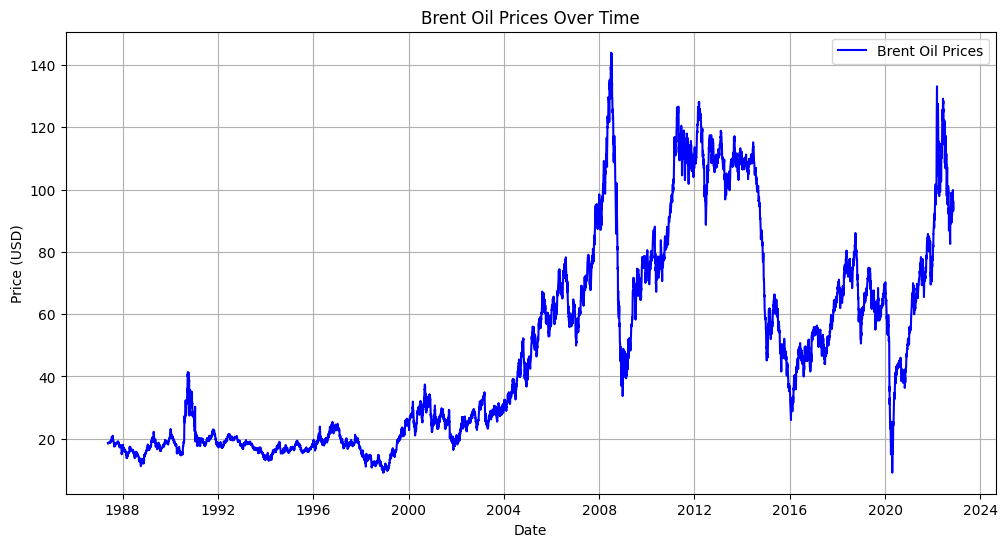

In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())

# Plotting the price trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Basic statistics for the 'Price' column
print("Basic Statistics for Price:")
print(df['Price'].describe())

Basic Statistics for Price:
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


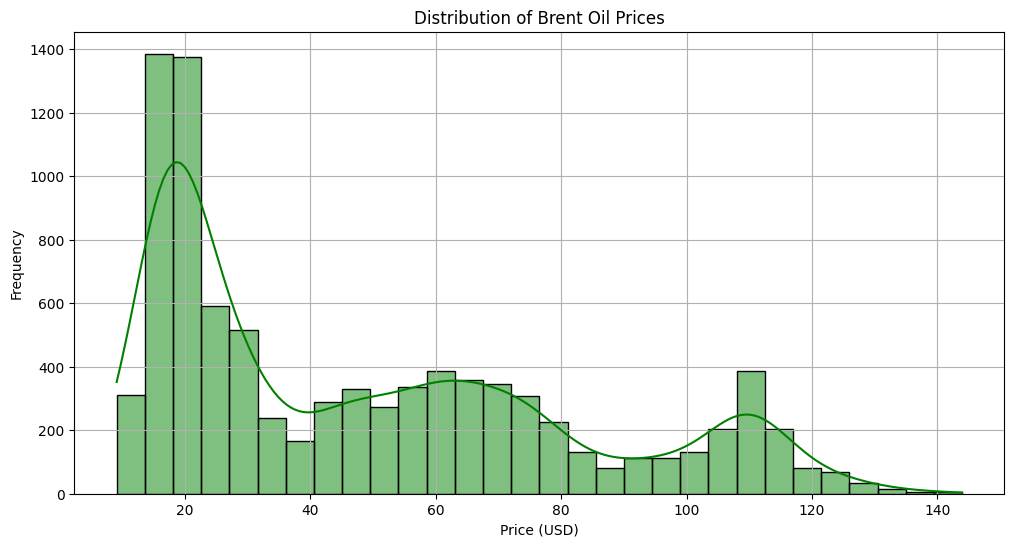

In [10]:
# Visualizing the distribution of prices
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, color='green', bins=30)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

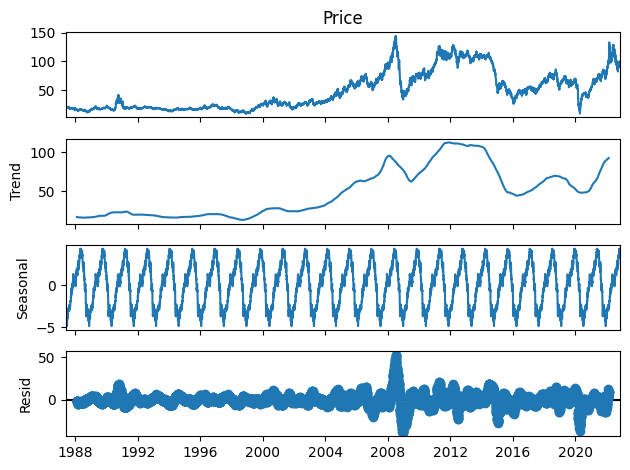

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Decomposing the time series
decomposition = seasonal_decompose(df['Price'], model='additive', period=365)  # period can be adjusted if needed

# Plot the decomposed components
decomposition.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_test = adfuller(df['Price'].dropna())  # Drop any NaN values if present
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Interpret the result
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -1.9938560113924664
p-value: 0.2892735048934034
The time series is not stationary.
